In [1]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px 
import plotly.io as pio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('ST.csv',sep = ',')

In [2]:
df.head()

,Language,Degree of endangerment,Level of endangerment,Number of speakers,Latitude,Longitude,Community Marriage Organisation,Name,fSD-dis-nondis,mSD-dis-nondis,...,Country codes alpha 3,ISO639-3 codes,Degree of endangerment.1,Alternate names,Name in the language,Number of speakers.1,Sources,Latitude.1,Longitude.1,Description of the location
0,Achang,NaN,NaN,NaN,NaN,NaN,NaN,Achang,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aka,Definitely endangered,2.0,4000.0,27.1666,92.6312,Agamous,Aka,1.0,1.0,...,IND,soh,Critically endangered,Jebel Sillok,NaN,300.0,"Bender, Ethnologue",11.0112,34.2333,NaN
2,Alike_T,NaN,NaN,NaN,NaN,NaN,Agamous,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ang_Kohima,Vulnerable,1.0,132000.0,25.7553,94.1308,Endogamy,Ang__Khonoma,1.0,0.0,...,IND,njm,Vulnerable,NaN,NaN,132000.0,NaN,25.7553,94.1308,between Dimapur (Assam) and Kohima (Nagaland)
4,Ang__Khonoma,NaN,NaN,NaN,NaN,NaN,Endogamy,Ang_Kohima,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Language", color="Level of endangerment", color_discrete_sequence=px.colors.sequential.Plasma_r, zoom=3, height=500,size_max=600)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":50,"t":0,"l":0,"b":0})
fig.update_traces(marker=dict(size=10)) 
fig.show()

In [23]:
pn = pd.read_csv('PN.csv',sep = ',')

In [24]:
pn.head()

,Unnamed: 0,Subsistence [B004],Community marriage organisation,ID,Name in English,ISO639-3 codes,Degree of endangerment,Level of endangerment,Alternate names,Name in the language,Number of speakers,Latitude,Longitude
0,Adnyamathanha,NaN,NaN,164.0,Adnyamathanha,adt,Definitely endangered,2.0,NaN,NaN,100.0,-30.6000,138.6035
1,AghuTharrnggala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alngith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alyawarr,Gathering,Agamous,165.0,Alawa,alh,Critically endangered,4.0,NaN,NaN,22.0,-16.4676,134.0771
4,Aminungo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
fig = px.scatter_mapbox(pn, lat="Latitude", lon="Longitude", hover_name="Name in English", color="Level of endangerment", color_discrete_sequence=px.colors.sequential.Plasma_r, zoom=3, height=300,size_max=200)
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":50,"t":0,"l":0,"b":0})
fig.update_traces(marker=dict(size=10)) 
fig.show()

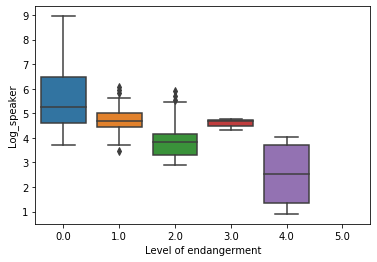

In [57]:
sns.boxplot(x='Level of endangerment',y='Log_speaker',data=df,width=0.8)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log10

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1291: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning:

invalid value encountered in less_equal

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning:

invalid value encountered in greater_equal



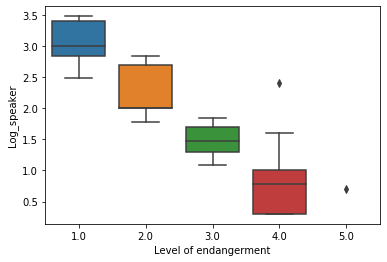

In [20]:
pn[['Log_speaker']]=np.log10(pn[['Number of speakers']])
sns.boxplot(x='Level of endangerment',y='Log_speaker',data=pn,width=0.8)

In [ ]:
sns.boxplot(x='',y='Log_speaker',data=df)

In [47]:
df[['Log_speaker']]=np.log10(df[['Number of speakers']])

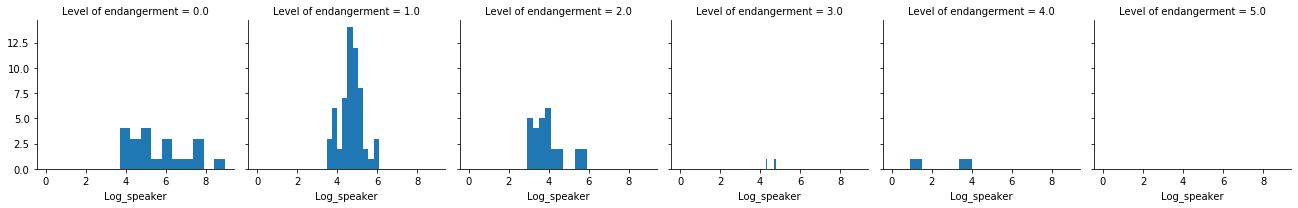

In [59]:
g = sns.FacetGrid(data=df,col='Level of endangerment')
g.map(plt.hist,'Log_speaker')

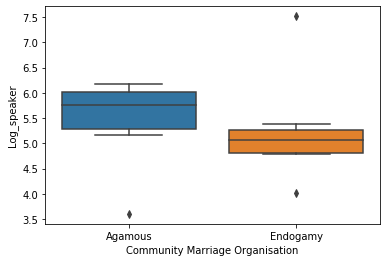

In [58]:
sns.boxplot(x='Community Marriage Organisation',y='Log_speaker',data=df,width=0.8)

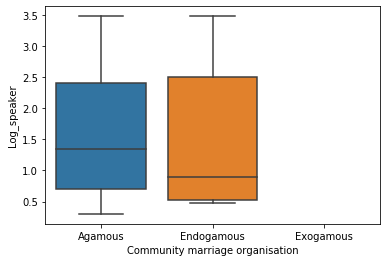

In [22]:
sns.boxplot(x='Community marriage organisation',y='Log_speaker',data=pn,width=0.8)

In [60]:
df.pivot_table(values='Log_speaker',index='Level of endangerment',columns='Community Marriage Organisation')

Community Marriage Organisation,Agamous,Endogamy
Level of endangerment,,
0.0,6.127636,7.518514
1.0,5.501267,5.056118
2.0,4.645854,NaN
4.0,NaN,4.019116


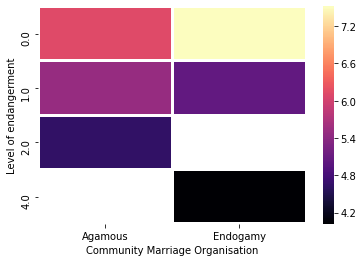

In [68]:
pvd = df.pivot_table(values='Log_speaker',index='Level of endangerment',columns='Community Marriage Organisation')
sns.heatmap(pvd,cmap='magma',linecolor='white',linewidths=2)

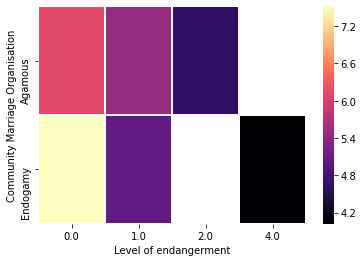

In [67]:
pvd = df.pivot_table(values='Log_speaker',index='Community Marriage Organisation',columns='Level of endangerment',)
sns.heatmap(pvd,cmap='magma',linecolor='white',linewidths=1)